In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

mpl.rc('font', family='Malgun Gothic')

# 데이터 불러오기

In [2]:
df_member = pd.read_csv('./Member_data02.csv')
df_product = pd.read_csv('./Product_data.csv')
df_sales = pd.read_csv('./Sales_data02.csv')

C:\Users\DMC CONET\AppData\Local\Temp\ipykernel_6540\3122442656.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sales = pd.read_csv('./Sales_data02.csv')


# info

In [3]:
df_member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81360 entries, 0 to 81359
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      81094 non-null  float64
 1   성별      81094 non-null  object 
 2   결혼유무    81094 non-null  object 
 3   거주지역    81094 non-null  object 
 4   연령      81094 non-null  float64
 5   결제등록카드  81094 non-null  object 
 6   유입경로    81094 non-null  object 
 7   자녀여부    81094 non-null  object 
dtypes: float64(2), object(6)
memory usage: 5.0+ MB


In [4]:
# 266건 이상치 제거

df_member.dropna(inplace = True)

In [5]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3048 entries, 0 to 3047
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   물품대분류   3048 non-null   object
 1   상품명     3048 non-null   object
 2   물품판매량   3048 non-null   int64 
 3   제품단가    3048 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 95.4+ KB


In [6]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   주문번호       199999 non-null  object 
 1   구매일        199999 non-null  object 
 2   배송시작일      199999 non-null  object 
 3   배송완료일      199999 non-null  object 
 4   구매시월령(수정)  168142 non-null  float64
 5   고객번호       199999 non-null  object 
 6   구매금액       199999 non-null  int64  
 7   결제금액       199999 non-null  int64  
 8   물품대분류      199999 non-null  object 
 9   상품명        199999 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.3+ MB


# 분기별 결제금액 및 고객수

In [8]:
# object형을 datetime형으로 변환

df_sales['구매일_dt'] = pd.to_datetime(df_sales['구매일'])

In [9]:
# 분기구분을 위한 연도, 월 변환

df_sales['연도'] = df_sales['구매일_dt'].dt.year
df_sales['월'] = df_sales['구매일_dt'].dt.month

In [10]:
# 분기구분

cond1 = df_sales['연도'] == 2019
cond2 = df_sales['연도'] == 2020
cond3 = (df_sales['월'] >= 1) & (df_sales['월'] <= 3)
cond4 = (df_sales['월'] >= 4) & (df_sales['월'] <= 6)
cond5 = (df_sales['월'] >= 7) & (df_sales['월'] <= 9)
cond6 = (df_sales['월'] >= 10) & (df_sales['월'] <= 12)

df_sales.loc[cond1 & cond3, '분기구분'] = '19_1/4분기'
df_sales.loc[cond1 & cond4, '분기구분'] = '19_2/4분기'
df_sales.loc[cond1 & cond5, '분기구분'] = '19_3/4분기'
df_sales.loc[cond1 & cond6, '분기구분'] = '19_4/4분기'
df_sales.loc[cond2 & cond3, '분기구분'] = '20_1/4분기'
df_sales.loc[cond2 & cond4, '분기구분'] = '20_2/4분기'
df_sales.loc[cond2 & cond5, '분기구분'] = '20_3/4분기'
df_sales.loc[cond2 & cond6, '분기구분'] = '20_4/4분기'

In [11]:
# 분기별 결제금액 및 구매금액

p1 = df_sales.pivot_table(index = '분기구분', 
                          values = ['구매금액', '결제금액'],
                          aggfunc = 'sum').reset_index()
p1['할인율'] = ((p1['구매금액'] - p1['결제금액']) / p1['구매금액']) * 100
p1

,분기구분,결제금액,구매금액,할인율
0,19_1/4분기,387112030,549790970,29.589235
1,19_2/4분기,622253640,863474850,27.936101
2,19_3/4분기,829886844,1147241820,27.662431
3,19_4/4분기,1009449090,1420074830,28.915782
4,20_1/4분기,856540647,1198304020,28.520590
5,20_2/4분기,469853796,679705320,30.873898
6,20_3/4분기,167641791,255783250,34.459434


In [12]:
# 20_3/4분기 제거

p1.iloc[ : -1, :]

,분기구분,결제금액,구매금액,할인율
0,19_1/4분기,387112030,549790970,29.589235
1,19_2/4분기,622253640,863474850,27.936101
2,19_3/4분기,829886844,1147241820,27.662431
3,19_4/4분기,1009449090,1420074830,28.915782
4,20_1/4분기,856540647,1198304020,28.520590
5,20_2/4분기,469853796,679705320,30.873898


Text(0.5, 1.0, '분기별 매출추이')

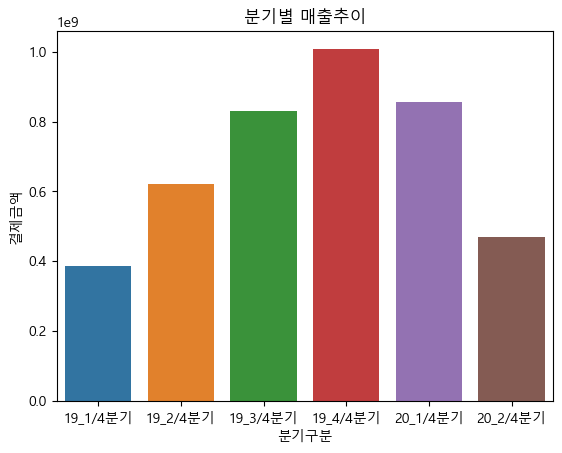

In [13]:
# 분기별 매출 시각화

fig1 = sns.barplot(data = p1.iloc[ : -1, :], x = '분기구분', y = '결제금액')
fig1.set_title('분기별 매출추이')

<AxesSubplot: ylabel='고객수'>

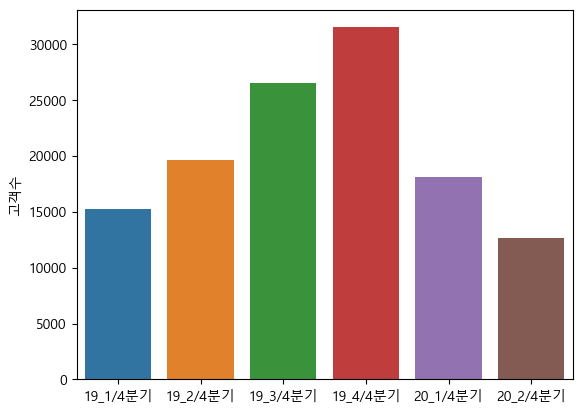

In [27]:
# 고객수 계산을 위한 column 추가
df_sales['count'] = 1
# 분기당 고객수를 구하기 위한 pivot_table(중복제거를 위한 aggfunc = 'min')
p1 = df_sales.pivot_table(index = '고객번호', columns = '분기구분', values = 'count', aggfunc = 'min')
# 각 column들의 합을 구한 리스트를 데이터프레임으로 변환
customer_list =  pd.DataFrame([p1['19_1/4분기'].sum(),
                    p1['19_2/4분기'].sum(),
                    p1['19_3/4분기'].sum(),
                    p1['19_4/4분기'].sum(),
                    p1['20_1/4분기'].sum(),
                    p1['20_2/4분기'].sum()])
# index는 분기별, column명을 고객수로 변환
customer_list.rename(index = { 0 : '19_1/4분기', 1 : '19_2/4분기', 2 : '19_3/4분기',
                             3 : '19_4/4분기', 4 : '20_1/4분기', 5 : '20_2/4분기'}, columns = { 0 : '고객수' }, inplace = True)
# 시각화(x부분은 reset_index()를 통해 column으로 뽑아낸 후 사용해도 무방)
sns.barplot(data = customer_list, x = customer_list.index.tolist(), y = '고객수')

In [28]:
# merge 위해 object형 변수 float로 변환
df_sales['고객번호(float)'] = df_sales['고객번호'].astype('float64')
# df_member와 df_sales를 각각 ID와 고객번호(float) column을 이용하여 merge
df_merge = pd.merge(df_member, df_sales, left_on = 'ID', right_on = '고객번호(float)', how = 'left')
# 결측치 제거
df_merge.dropna(inplace = True)
# 고객ID별 구매금액 및 결제금액 총합
p1 = df_merge.pivot_table(index = 'ID', values = ['구매금액', '결제금액'], aggfunc = 'sum')
# 유입경로별 고객들의 결제금액 평균을 보기 위해 merge 후 pivot_table 사용
p2 = pd.merge(df_member, p1, left_on = 'ID', right_on = 'ID', how = 'left')
p2.dropna(inplace = True)
p2.pivot_table(index = '유입경로', values = '결제금액').sort_values(by='결제금액', ascending=False)

,결제금액
유입경로,
이마트,60304.977143
네이버블로그,58487.884963
오픈마켓,58112.044876
페이스북,57525.098390
지인추천,57313.104346
인스타그램,57157.399517
네이버카페,56666.875403
검색광고,55592.029770
직접검색,53434.101075


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '검색광고'),
  Text(1, 0, '네이버블로그'),
  Text(2, 0, '네이버카페'),
  Text(3, 0, '매장쿠폰'),
  Text(4, 0, '오픈마켓'),
  Text(5, 0, '이마트'),
  Text(6, 0, '인스타그램'),
  Text(7, 0, '지인추천'),
  Text(8, 0, '직접검색'),
  Text(9, 0, '페이스북')])

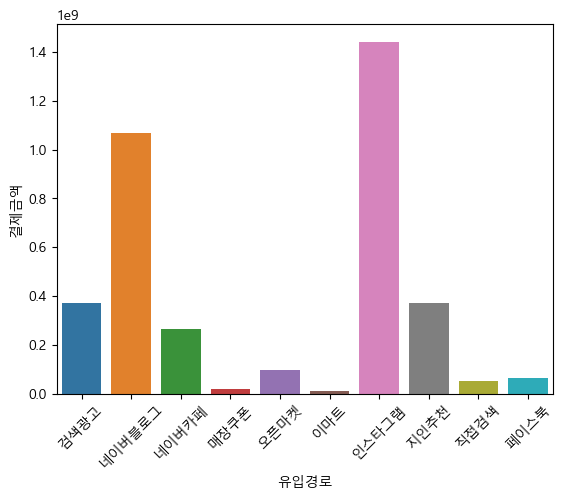

In [38]:
# 유입경로별 고객들의 결제금액 총합
p3 = p2.pivot_table(index = '유입경로', values = '결제금액', aggfunc = 'sum').reset_index()
# 시각화
sns.barplot(data = p3, x = '유입경로', y = '결제금액')
# 글씨가 겹쳐 x축 글자들을 회전시킴
plt.xticks(rotation = 45)

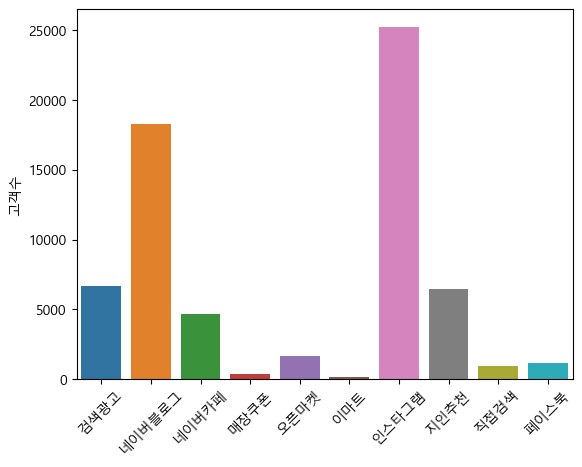

In [43]:
# 유입경로별 고객수 구하기
p1 = df_merge.pivot_table(index = 'ID', columns = '유입경로', values = 'count', aggfunc = 'min').reset_index()
channel_list = [p1['검색광고'].sum(), 
                p1['네이버블로그'].sum(), 
                p1['네이버카페'].sum(), 
                p1['매장쿠폰'].sum(), 
                p1['오픈마켓'].sum(), 
                p1['이마트'].sum(), 
                p1['인스타그램'].sum(), 
                p1['지인추천'].sum(), 
                p1['직접검색'].sum(), 
                p1['페이스북'].sum()]
df_channel = pd.DataFrame(channel_list, index = ['검색광고', '네이버블로그',
                                                '네이버카페', '매장쿠폰', '오픈마켓',
                                                '이마트', '인스타그램', '지인추천', '직접검색', '페이스북'],
                          columns = ['고객수'])
# 시각화
sns.barplot(data = df_channel, x = df_channel.index.tolist(), y = '고객수')
plt.xticks(rotation = 45)
plt.show()

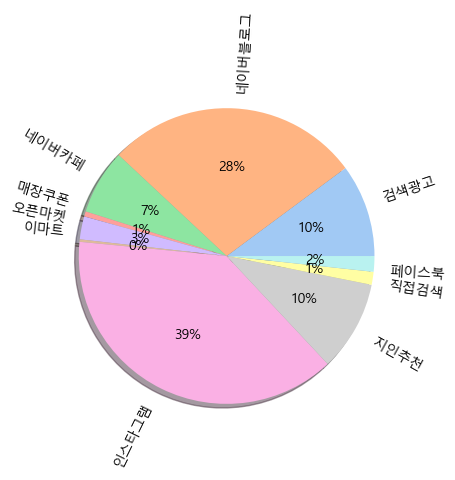

In [49]:
# pie차트 시각화
colors = sns.color_palette('pastel')

plt.pie(df_channel['고객수'], labels=df_channel.index.tolist(), colors=colors,
        autopct='%.0f%%', shadow=True, rotatelabels='true')
plt.show()

In [50]:
# 유입경로별 평균 결제금액, 구매금액 확인
df_merge.pivot_table(index = '유입경로', values = ['구매금액', '결제금액'], aggfunc = 'mean').sort_values(by = '결제금액', ascending = False)

,결제금액,구매금액
유입경로,,
이마트,24094.454338,33641.415525
페이스북,23026.516291,32242.216255
네이버블로그,22610.747441,31959.093428
네이버카페,22390.185358,31599.177791
지인추천,22345.256956,31499.127456
검색광고,22274.991867,31464.057473
인스타그램,22250.354476,31348.960753
오픈마켓,22105.366090,31342.991926
직접검색,21577.817629,30795.900999


In [51]:
# 고객별 결제금액 총합
p1 = df_merge.pivot_table(index = 'ID', values = '결제금액', aggfunc = 'sum').reset_index()

,ID,결제금액
0,2.018123e+14,54083
1,2.018123e+14,47922
2,2.018123e+14,116532
3,2.018123e+14,19900
4,2.018123e+14,166877
...,...,...
65541,2.019123e+14,19602
65542,2.019123e+14,3000
65543,2.019123e+14,14406
65544,2.019123e+14,163234


In [52]:
# 결제금액별 고객등급 구분
cond1 = p1['결제금액'] >= 500000
cond2 = (p1['결제금액'] >= 300000) & (p1['결제금액'] < 500000)
cond3 = (p1['결제금액'] >= 100000) & (p1['결제금액'] < 300000)
cond4 = p1['결제금액'] < 100000

p1.loc[cond1, '고객구분'] = 'VIP'
p1.loc[cond2, '고객구분'] = 'Gold'
p1.loc[cond3, '고객구분'] = 'Silver'
p1.loc[cond4, '고객구분'] = 'Basic'

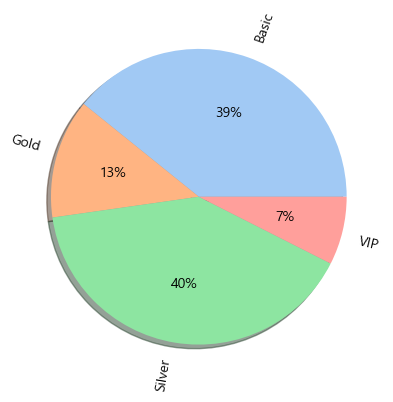

In [53]:
# 고객등급별 결제금액 총합
payment_table = p1.pivot_table(index = '고객구분', values = '결제금액', aggfunc = 'sum').reset_index()

# pie차트 시각화
colors = sns.color_palette('pastel')
plt.pie(payment_table['결제금액'], labels = payment_table['고객구분'].tolist(), colors=colors,
        autopct='%.0f%%', shadow=True, rotatelabels='true')
plt.show()

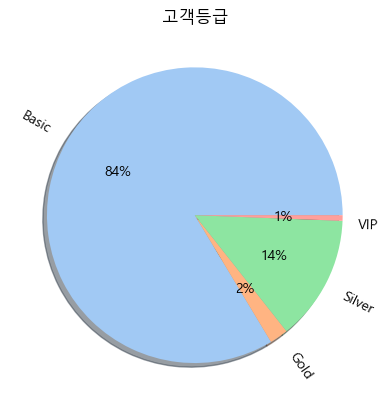

In [54]:
# 고객등급별 고객수 확인
p1['count'] = 1

# 위에서와 달리 p1은 ID를 기준으로 pivot했기 때문에 바로 sum을 통해 고객수를 구할 수 있음
sum_table = p1.pivot_table(index = '고객구분', values = 'count', aggfunc = 'sum').reset_index()

# pie차트 시각화
colors = sns.color_palette('pastel')
plt.pie(sum_table['count'], labels = sum_table['고객구분'].tolist(), colors=colors,
        autopct='%.0f%%', shadow=True, rotatelabels='true')
plt.title('고객등급')
plt.show()

In [57]:
# df_merge에 고객별 결제금액 총합 column을 추가
p2 = pd.merge(df_merge, p1, on = 'ID', how = 'left')

In [58]:
# 필요한 column들만 뽑아서 새로운 데이터프레임 생성
new_df = p2[['ID', '성별', '결혼유무', '거주지역', '연령', '결제등록카드', '유입경로', '자녀여부', '구매시월령(수정)', '물품대분류', '고객구분']]

In [62]:
# 연령 -> 연령구분

cond1 = (new_df['연령'] >= 20) & (new_df['연령'] < 30)
cond2 = (new_df['연령'] >= 30) & (new_df['연령'] < 35)
cond3 = (new_df['연령'] >= 35) & (new_df['연령'] < 40)
cond4 = (new_df['연령'] >= 40)

new_df.loc[cond1, '연령구분'] = '20대'
new_df.loc[cond2, '연령구분'] = '30대초반'
new_df.loc[cond3, '연령구분'] = '30대후반'
new_df.loc[cond4, '연령구분'] = '40대이상'

C:\Users\DMC CONET\AppData\Local\Temp\ipykernel_6540\307310527.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[cond1, '연령구분'] = '20대'


In [63]:
# 구매시월령 -> 월령구분

cond1 = new_df['구매시월령(수정)'] < 0
cond2 = (new_df['구매시월령(수정)'] >= 0) & (new_df['구매시월령(수정)'] <= 3)
cond3 = (new_df['구매시월령(수정)'] > 3) & (new_df['구매시월령(수정)'] <= 6)
cond4 = (new_df['구매시월령(수정)'] > 6) & (new_df['구매시월령(수정)'] <= 12)
cond5 = (new_df['구매시월령(수정)'] > 12) & (new_df['구매시월령(수정)'] <= 18)
cond6 = (new_df['구매시월령(수정)'] > 18) & (new_df['구매시월령(수정)'] <= 24)
cond7 = (new_df['구매시월령(수정)'] > 24) & (new_df['구매시월령(수정)'] <= 36)
cond8 = (new_df['구매시월령(수정)'] > 36) & (new_df['구매시월령(수정)'] <= 48)
cond9 = (new_df['구매시월령(수정)'] > 48) & (new_df['구매시월령(수정)'] <= 60)
cond10 = (new_df['구매시월령(수정)'] > 60) & (new_df['구매시월령(수정)'] <= 72)
cond11 = (new_df['구매시월령(수정)'] > 72) & (new_df['구매시월령(수정)'] <= 84)
cond12 = (new_df['구매시월령(수정)'] > 84) & (new_df['구매시월령(수정)'] <= 96)
cond13 = new_df['구매시월령(수정)'] > 96

new_df.loc[cond1, '월령구분'] = '태아'
new_df.loc[cond2, '월령구분'] = '0-3개월'
new_df.loc[cond3, '월령구분'] = '3-6개월'
new_df.loc[cond4, '월령구분'] = '6-12개월'
new_df.loc[cond5, '월령구분'] = '12-18개월'
new_df.loc[cond6, '월령구분'] = '18-24개월'
new_df.loc[cond7, '월령구분'] = '2-3세'
new_df.loc[cond8, '월령구분'] = '3-4세'
new_df.loc[cond9, '월령구분'] = '4-5세'
new_df.loc[cond10, '월령구분'] = '5-6세'
new_df.loc[cond11, '월령구분'] = '6-7세'
new_df.loc[cond12, '월령구분'] = '7-8세'
new_df.loc[cond13, '월령구분'] = '8세이상'

C:\Users\DMC CONET\AppData\Local\Temp\ipykernel_6540\3551843292.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[cond1, '월령구분'] = '태아'


# 군집분석(K-Means)

In [67]:
# 군집분석을 위한 X 생성
X = new_df[['성별', '결혼유무', '연령구분', '유입경로', '자녀여부', '월령구분', '물품대분류']]

In [68]:
# 군집분석은 데이터 간의 "수치적 거리"를 계산하여 특성이 비슷한 여러 집단으로 나누기 때문에
# 범주형 변수를 연속형 변수로 바꿔 주어야 함(One Hot Encoding/Label Encoding)
ohe = OneHotEncoder(sparse = False)
ohe.fit(X[['성별', '결혼유무', '연령구분', '유입경로', '자녀여부', '월령구분', '물품대분류']])
# One Hot Encoding을 시행한 후 나오는 결과는 데이터프레임이 아닌 numpy 배열
X_dummy = ohe.transform(X[['성별', '결혼유무', '연령구분', '유입경로', '자녀여부', '월령구분', '물품대분류']])
# 따라서 데이터프레임의 형태로 바꿔주어야 함, column명은 OneHotEncoder 함수에 내장된 get_feature_names()를 이용
X_ohe = pd.DataFrame(X_dummy, columns = ohe.get_feature_names())

C:\Users\DMC CONET\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 실루엣 스코어 확인

In [71]:
from sklearn.metrics import silhouette_score

In [ ]:
for i in [3, 4, 5, 6, 7, 8] :
    cluster = KMeans(n_clusters = i)
    cluster.fit(X_ohe)
    X_cluster = cluster.fit_predict(X_ohe)
    print(i, '개의 군집 silhouette : ', silhouette_score(X_ohe, X_cluster))

# 엘보우 차트 확인

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(X_ohe)

In [ ]:
# 실루엣 스코어와 엘보우 차트를 확인하여 나온 최적의 군집갯수(n = 3)

cluster = KMeans(n_clusters = 3)
cluster.fit(X_ohe)
X_ohe['kmeans_cluster'] = cluster.fit_predict(X_ohe)
X_ohe['kmeans_cluster'].value_counts()

# 0번 군집 특성 확인

    - 30초반

In [ ]:
X_ohe[X_ohe['kmeans_cluster'] == 0][['x0_남', 'x0_여']].value_counts()

# 여자 : 77345 / 남자 : 2521

In [ ]:
X_ohe[X_ohe['kmeans_cluster'] == 0][['x1_기혼', 'x1_미혼']].value_counts()

# 기혼 : 79866

In [ ]:
X_ohe[X_ohe['kmeans_cluster'] == 0][['x2_20대', 'x2_30대초반', 'x2_30대후반',
       'x2_40대이상']].value_counts()

# 30대초반 : 79866

In [ ]:
X_ohe[X_ohe['kmeans_cluster'] == 0][['x3_검색광고', 'x3_네이버블로그', 'x3_네이버카페', 'x3_매장쿠폰', 'x3_오픈마켓',
       'x3_이마트', 'x3_인스타그램', 'x3_지인추천', 'x3_직접검색', 'x3_페이스북']].value_counts()

# 인스타 : 30903 / 네이버블로그 : 22448 / 지인추천 : 7873 / 검색광고 : 7808

In [ ]:
X_ohe[X_ohe['kmeans_cluster'] == 0][['x4_No',
       'x4_Yes']].value_counts()

# 자녀O

In [ ]:
X_ohe[X_ohe['kmeans_cluster'] == 0][['x5_0-3개월', 'x5_12-18개월', 'x5_18-24개월', 'x5_2-3세', 'x5_3-4세',
       'x5_3-6개월', 'x5_4-5세', 'x5_5-6세', 'x5_6-12개월', 'x5_6-7세', 'x5_7-8세',
       'x5_8세이상', 'x5_태아']].value_counts()

# 0~3개월 : 22491 / 6~12개월 : 16877 / 3~6개월 : 13131

In [ ]:
X_ohe[X_ohe['kmeans_cluster'] == 0][['x6_FC', 'x6_FMC', 'x6_SKC', 'x6_SrC', 'x6_기저귀',
       'x6_기타', 'x6_더블하트', 'x6_물티슈', 'x6_체험팩', 'x6_팬티']].value_counts()

# 더블하트 : 16030 / 체험팩 : 15289 / 기저귀 : 15029 / 팬티 : 11956

# 1번 군집 특성 확인

    - 30대 초반을 제외한 집단

In [ ]:
X_ohe[X_ohe['kmeans_cluster'] == 1][['x0_남', 'x0_여']].value_counts()

# 여자 : 55474 / 남자 : 1740

In [ ]:
X_ohe[X_ohe['kmeans_cluster'] == 1][['x1_기혼', 'x1_미혼']].value_counts()

# 기혼 : 57214

In [ ]:
X_ohe[X_ohe['kmeans_cluster'] == 1][['x2_20대', 'x2_30대초반', 'x2_30대후반',
       'x2_40대이상']].value_counts()

# 30대후반 : 38649 / 20대 : 17016

In [ ]:
X_ohe[X_ohe['kmeans_cluster'] == 1][['x3_검색광고', 'x3_네이버블로그', 'x3_네이버카페', 'x3_매장쿠폰', 'x3_오픈마켓',
       'x3_이마트', 'x3_인스타그램', 'x3_지인추천', 'x3_직접검색', 'x3_페이스북']].value_counts()

# 인스타 : 21851 / 네이버블로그 : 16499 / 검색광고 : 5734

In [ ]:
X_ohe[X_ohe['kmeans_cluster'] == 1][['x4_No',
       'x4_Yes']].value_counts()

# 자녀 O 55504

In [ ]:
X_ohe[X_ohe['kmeans_cluster'] == 1][['x5_0-3개월', 'x5_12-18개월', 'x5_18-24개월', 'x5_2-3세', 'x5_3-4세',
       'x5_3-6개월', 'x5_4-5세', 'x5_5-6세', 'x5_6-12개월', 'x5_6-7세', 'x5_7-8세',
       'x5_8세이상', 'x5_태아']].value_counts()

# 0~3개월 : 16182 / 6~12개월 : 11745 / 3~6개월 : 9562

In [ ]:
X_ohe[X_ohe['kmeans_cluster'] == 1][['x6_FC', 'x6_FMC', 'x6_SKC', 'x6_SrC', 'x6_기저귀',
       'x6_기타', 'x6_더블하트', 'x6_물티슈', 'x6_체험팩', 'x6_팬티']].value_counts()

# 더블하트 : 11781 / 체험팩 : 10971 / 기저귀 : 10691 / 팬티 : 8452

# 2번 군집 특성 확인

    - 자녀X, 선물용 물품 구매 집단

In [ ]:
X_ohe[X_ohe['kmeans_cluster'] == 2][['x0_남', 'x0_여']].value_counts()

# 여자 : 29732 / 남자 : 1028

In [ ]:
X_ohe[X_ohe['kmeans_cluster'] == 2][['x1_기혼', 'x1_미혼']].value_counts()

# 미혼 : 25583 / 기혼 : 5177

In [ ]:
X_ohe[X_ohe['kmeans_cluster'] == 2][['x2_20대', 'x2_30대초반', 'x2_30대후반',
       'x2_40대이상']].value_counts()

# 30대초반 : 19024 / 30대후반 : 6973 / 20대 : 4279

In [ ]:
X_ohe[X_ohe['kmeans_cluster'] == 2][['x3_검색광고', 'x3_네이버블로그', 'x3_네이버카페', 'x3_매장쿠폰', 'x3_오픈마켓',
       'x3_이마트', 'x3_인스타그램', 'x3_지인추천', 'x3_직접검색', 'x3_페이스북']].value_counts()

In [ ]:
X_ohe[X_ohe['kmeans_cluster'] == 2][['x4_No',
       'x4_Yes']].value_counts()

# 자녀 X

In [ ]:
X_ohe[X_ohe['kmeans_cluster'] == 2][['x5_0-3개월', 'x5_12-18개월', 'x5_18-24개월', 'x5_2-3세', 'x5_3-4세',
       'x5_3-6개월', 'x5_4-5세', 'x5_5-6세', 'x5_6-12개월', 'x5_6-7세', 'x5_7-8세',
       'x5_8세이상', 'x5_태아']].value_counts()

In [ ]:
X_ohe[X_ohe['kmeans_cluster'] == 2][['x6_FC', 'x6_FMC', 'x6_SKC', 'x6_SrC', 'x6_기저귀',
       'x6_기타', 'x6_더블하트', 'x6_물티슈', 'x6_체험팩', 'x6_팬티']].value_counts()

# 모델링(DecisionTreeClassifier, XGBClassifier, RandomForestClassifier)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [72]:
# Modeling을 위한 X, Y 구분

X = new_df[['성별', '결혼유무', '거주지역', '연령', '결제등록카드', '유입경로', '자녀여부', '구매시월령(수정)', '물품대분류']]
Y = new_df['고객구분']

In [73]:
# 연속형, 범주형 변수 구분하여 리스트로 저장

numeric_list = X.describe().columns.tolist()
category_list = X.describe(include = 'object').columns.tolist()

# DecisionTree_ohe

In [74]:
# 학습 데이터와 검증 데이터 나누기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42)

# MinMaxScaler를 통한 연속형 변수 전처리
scaler = MinMaxScaler()
scaler.fit(X_train[numeric_list])
X_train[numeric_list] = scaler.transform(X_train[numeric_list])
X_test[numeric_list] = scaler.transform(X_test[numeric_list])

# OneHotEncoder를 통한 범주형 변수 전처리
ohe = OneHotEncoder(sparse = False)
ohe.fit(X_train[category_list])
X_train_dummy = ohe.transform(X_train[category_list])
X_test_dummy = ohe.transform(X_test[category_list])
X_train_ohe = pd.DataFrame(X_train_dummy, columns = ohe.get_feature_names())
X_test_ohe = pd.DataFrame(X_test_dummy, columns = ohe.get_feature_names())

# 전처리가 완료된 연속형 변수와 범주형 변수를 다시 합침
new_X_train = pd.concat([X_train[numeric_list].reset_index().iloc[ : , 1 : ], X_train_ohe], axis = 1)
new_X_test = pd.concat([X_test[numeric_list].reset_index().iloc[ : , 1 : ], X_test_ohe], axis = 1)

# Model 학습
model = DecisionTreeClassifier()
model.fit(new_X_train, Y_train)

# 학습된 Model을 통해 결과 예측
Y_train_pred = model.predict(new_X_train)
Y_test_pred = model.predict(new_X_test)

# Score 확인
print(classification_report(Y_train, Y_train_pred))
print(classification_report(Y_test, Y_test_pred))

C:\Users\DMC CONET\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\DMC CONET\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

       Basic       0.97      0.99      0.98     70096
        Gold       0.96      0.96      0.96     11372
      Silver       0.98      0.95      0.97     38593
         VIP       0.99      0.95      0.97      5819

    accuracy                           0.97    125880
   macro avg       0.98      0.96      0.97    125880
weighted avg       0.97      0.97      0.97    125880

              precision    recall  f1-score   support

       Basic       0.74      0.74      0.74     23454
        Gold       0.44      0.47      0.45      3701
      Silver       0.55      0.54      0.54     12851
         VIP       0.58      0.62      0.60      1954

    accuracy                           0.65     41960
   macro avg       0.58      0.59      0.58     41960
weighted avg       0.65      0.65      0.65     41960



# DecisionTree_SMOTE

In [76]:
from imblearn.over_sampling import SMOTE

In [65]:
X[numeric_list] = X[numeric_list].fillna(0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42)

scaler = MinMaxScaler()
scaler.fit(X_train[numeric_list])
X_train[numeric_list] = scaler.transform(X_train[numeric_list])
X_test[numeric_list] = scaler.transform(X_test[numeric_list])

ohe = OneHotEncoder(sparse = False)
ohe.fit(X_train[category_list])
X_train_dummy = ohe.transform(X_train[category_list])
X_test_dummy = ohe.transform(X_test[category_list])
X_train_ohe = pd.DataFrame(X_train_dummy, columns = ohe.get_feature_names())
X_test_ohe = pd.DataFrame(X_test_dummy, columns = ohe.get_feature_names())

new_X_train = pd.concat([X_train[numeric_list].reset_index().iloc[ : , 1 : ], X_train_ohe], axis = 1)
new_X_test = pd.concat([X_test[numeric_list].reset_index().iloc[ : , 1 : ], X_test_ohe], axis = 1)

# 위의 모델과 같지만 SMOTE 알고리즘을 통해 불균형 데이터를 맞춰주는 과정
over_sampler = SMOTE()
over_sampler.fit(new_X_train, Y_train)
X_over, Y_over = over_sampler.fit_resample(new_X_train, Y_train)

model = DecisionTreeClassifier()
model.fit(X_over, Y_over)

Y_train_pred = model.predict(X_over)
Y_test_pred = model.predict(new_X_test)

print(classification_report(Y_over, Y_train_pred))
print(classification_report(Y_test, Y_test_pred))

C:\Users\DMC CONET\AppData\Local\Temp\ipykernel_10324\3718192988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_list] = X[numeric_list].fillna(0)
C:\Users\DMC CONET\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\DMC CONET\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

       Basic       0.97      0.99      0.98     70229
        Gold       0.99      0.99      0.99     70229
      Silver       0.99      0.97      0.98     70229
         VIP       1.00      1.00      1.00     70229

    accuracy                           0.99    280916
   macro avg       0.99      0.99      0.99    280916
weighted avg       0.99      0.99      0.99    280916

              precision    recall  f1-score   support

       Basic       0.74      0.72      0.73     23501
        Gold       0.42      0.46      0.44      3698
      Silver       0.54      0.54      0.54     12847
         VIP       0.57      0.61      0.59      1984

    accuracy                           0.64     42030
   macro avg       0.57      0.58      0.58     42030
weighted avg       0.64      0.64      0.64     42030



# DecisionTree_Label

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
X[numeric_list] = X[numeric_list].fillna(0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42)

scaler = MinMaxScaler()
scaler.fit(X_train[numeric_list])
X_train[numeric_list] = scaler.transform(X_train[numeric_list])
X_test[numeric_list] = scaler.transform(X_test[numeric_list])

# LabelEncoder를 통한 범주형 변수 전처리
for i in category_list :
    le = LabelEncoder()
    le.fit(X[i])
    X_train[i] = le.transform(X_train[i])
    X_test[i] = le.transform(X_test[i])

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print(classification_report(Y_train, Y_train_pred))
print(classification_report(Y_test, Y_test_pred))

C:\Users\DMC CONET\AppData\Local\Temp\ipykernel_10324\1148480974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_list] = X[numeric_list].fillna(0)


              precision    recall  f1-score   support

       Basic       0.97      0.99      0.98     70229
        Gold       0.96      0.96      0.96     11396
      Silver       0.99      0.94      0.96     38669
         VIP       0.99      0.94      0.97      5793

    accuracy                           0.97    126087
   macro avg       0.98      0.96      0.97    126087
weighted avg       0.97      0.97      0.97    126087

              precision    recall  f1-score   support

       Basic       0.74      0.71      0.73     23501
        Gold       0.41      0.47      0.44      3698
      Silver       0.53      0.53      0.53     12847
         VIP       0.56      0.61      0.58      1984

    accuracy                           0.63     42030
   macro avg       0.56      0.58      0.57     42030
weighted avg       0.64      0.63      0.64     42030



In [ ]:
X = new_df[['성별', '결혼유무', '거주지역', '연령', '결제등록카드', '유입경로', '자녀여부', '구매시월령(수정)', '물품대분류']]
Y = new_df['고객구분']

numeric_list = X.describe().columns.tolist()
category_list = X.describe(include = 'object').columns.tolist()

In [68]:
from xgboost import XGBClassifier
from xgboost import plot_importance

# XGB_Label

In [69]:
X = new_df[['성별', '결혼유무', '거주지역', '연령', '결제등록카드', '유입경로', '자녀여부', '구매시월령(수정)', '물품대분류']]
Y = new_df['고객구분']
X = X.rename(columns = {'성별' : 'gender', '결혼유무' : 'marriage', '거주지역' : 'region',
                       '연령' : 'age', '결제등록카드' : 'bank', '유입경로' : 'channel',
                       '자녀여부' : 'kids', '구매시월령(수정)' : 'month_age',
                       '물품대분류' : 'goods'})
Y = Y.replace({'Basic' : 0, 'Silver' : 1, 'Gold' : 2, 'VIP' : 3})

numeric_list = X.describe().columns.tolist()
category_list = X.describe(include = 'object').columns.tolist()

X[numeric_list] = X[numeric_list].fillna(0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42)

scaler = MinMaxScaler()
scaler.fit(X_train[numeric_list])
X_train[numeric_list] = scaler.transform(X_train[numeric_list])
X_test[numeric_list] = scaler.transform(X_test[numeric_list])

for i in category_list :
    le = LabelEncoder()
    le.fit(X[i])
    X_train[i] = le.transform(X_train[i])
    X_test[i] = le.transform(X_test[i])

model = XGBClassifier()
model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print(classification_report(Y_train, Y_train_pred))
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.70      0.87      0.78     70229
           1       0.56      0.50      0.53     38669
           2       0.85      0.15      0.25     11396
           3       0.95      0.34      0.50      5793

    accuracy                           0.67    126087
   macro avg       0.76      0.47      0.52    126087
weighted avg       0.68      0.67      0.64    126087

              precision    recall  f1-score   support

           0       0.69      0.86      0.77     23501
           1       0.54      0.49      0.51     12847
           2       0.80      0.13      0.22      3698
           3       0.90      0.29      0.44      1984

    accuracy                           0.65     42030
   macro avg       0.73      0.44      0.48     42030
weighted avg       0.67      0.65      0.63     42030



<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

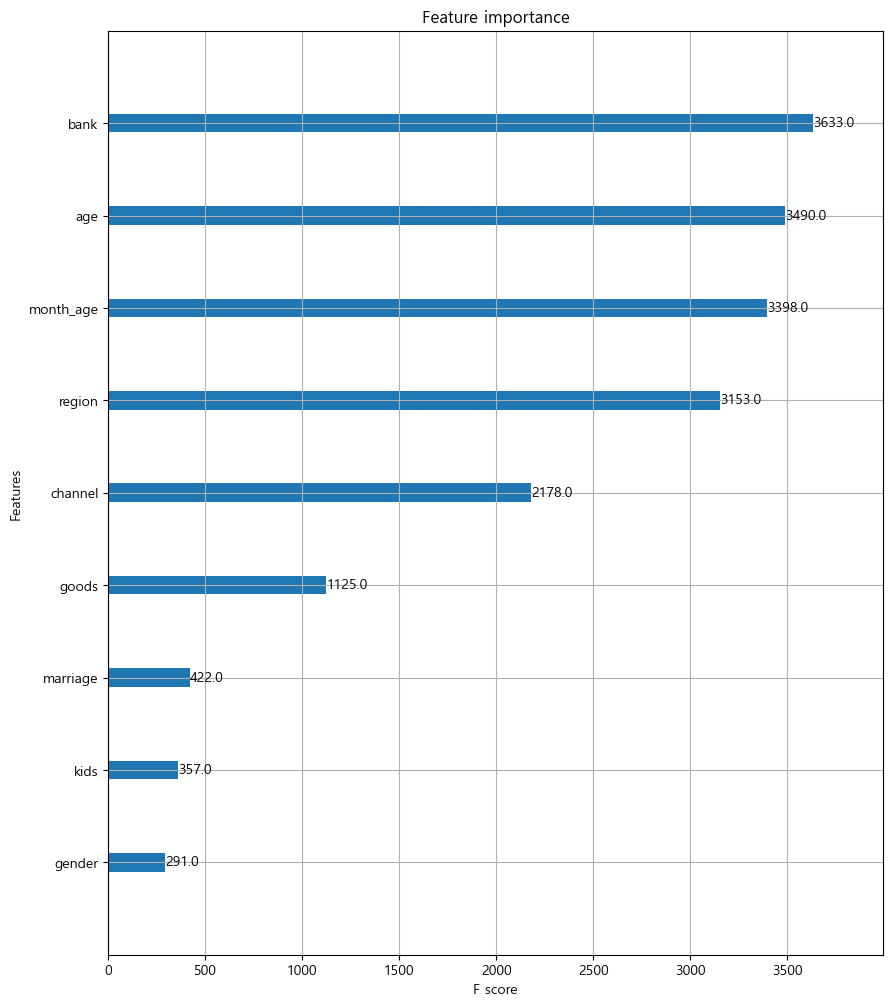

In [70]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(model, ax=ax)

# XGB_SMOTE

In [71]:
X = new_df[['성별', '결혼유무', '거주지역', '연령', '결제등록카드', '유입경로', '자녀여부', '구매시월령(수정)', '물품대분류']]
Y = new_df['고객구분']
X = X.rename(columns = {'성별' : 'gender', '결혼유무' : 'marriage', '거주지역' : 'region',
                       '연령' : 'age', '결제등록카드' : 'bank', '유입경로' : 'channel',
                       '자녀여부' : 'kids', '구매시월령(수정)' : 'month_age',
                       '물품대분류' : 'goods'})
Y = Y.replace({'Basic' : 0, 'Silver' : 1, 'Gold' : 2, 'VIP' : 3})

numeric_list = X.describe().columns.tolist()
category_list = X.describe(include = 'object').columns.tolist()

X[numeric_list] = X[numeric_list].fillna(0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42)

scaler = MinMaxScaler()
scaler.fit(X_train[numeric_list])
X_train[numeric_list] = scaler.transform(X_train[numeric_list])
X_test[numeric_list] = scaler.transform(X_test[numeric_list])

ohe = OneHotEncoder(sparse = False)
ohe.fit(X_train[category_list])
X_train_dummy = ohe.transform(X_train[category_list])
X_test_dummy = ohe.transform(X_test[category_list])
X_train_ohe = pd.DataFrame(X_train_dummy, columns = ohe.get_feature_names())
X_test_ohe = pd.DataFrame(X_test_dummy, columns = ohe.get_feature_names())

new_X_train = pd.concat([X_train[numeric_list].reset_index().iloc[ : , 1 : ], X_train_ohe], axis = 1)
new_X_test = pd.concat([X_test[numeric_list].reset_index().iloc[ : , 1 : ], X_test_ohe], axis = 1)
    
over_sampler = SMOTE()
over_sampler.fit(new_X_train, Y_train)
X_over, Y_over = over_sampler.fit_resample(new_X_train, Y_train)

model = XGBClassifier()
model.fit(X_over, Y_over)

Y_train_pred = model.predict(X_over)
Y_test_pred = model.predict(new_X_test)

print(classification_report(Y_over, Y_train_pred))
print(classification_report(Y_test, Y_test_pred))

C:\Users\DMC CONET\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\DMC CONET\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.68      0.81      0.74     70229
           1       0.63      0.51      0.56     70229
           2       0.74      0.73      0.73     70229
           3       0.82      0.84      0.83     70229

    accuracy                           0.72    280916
   macro avg       0.72      0.72      0.72    280916
weighted avg       0.72      0.72      0.72    280916

              precision    recall  f1-score   support

           0       0.71      0.79      0.75     23501
           1       0.55      0.45      0.49     12847
           2       0.45      0.29      0.36      3698
           3       0.39      0.60      0.47      1984

    accuracy                           0.63     42030
   macro avg       0.53      0.53      0.52     42030
weighted avg       0.62      0.63      0.62     42030



In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
X = new_df[['성별', '결혼유무', '거주지역', '연령', '결제등록카드', '유입경로', '자녀여부', '구매시월령(수정)', '물품대분류']]
Y = new_df['고객구분']
X = X.rename(columns = {'성별' : 'gender', '결혼유무' : 'marriage', '거주지역' : 'region',
                       '연령' : 'age', '결제등록카드' : 'bank', '유입경로' : 'channel',
                       '자녀여부' : 'kids', '구매시월령(수정)' : 'month_age',
                       '물품대분류' : 'goods'})
Y = Y.replace({'Basic' : 0, 'Silver' : 1, 'Gold' : 2, 'VIP' : 3})

numeric_list = X.describe().columns.tolist()
category_list = X.describe(include = 'object').columns.tolist()

X[numeric_list] = X[numeric_list].fillna(0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42)

scaler = MinMaxScaler()
scaler.fit(X_train[numeric_list])
X_train[numeric_list] = scaler.transform(X_train[numeric_list])
X_test[numeric_list] = scaler.transform(X_test[numeric_list])

ohe = OneHotEncoder(sparse = False)
ohe.fit(X_train[category_list])
X_train_dummy = ohe.transform(X_train[category_list])
X_test_dummy = ohe.transform(X_test[category_list])
X_train_ohe = pd.DataFrame(X_train_dummy, columns = ohe.get_feature_names())
X_test_ohe = pd.DataFrame(X_test_dummy, columns = ohe.get_feature_names())

new_X_train = pd.concat([X_train[numeric_list].reset_index().iloc[ : , 1 : ], X_train_ohe], axis = 1)
new_X_test = pd.concat([X_test[numeric_list].reset_index().iloc[ : , 1 : ], X_test_ohe], axis = 1)
    
over_sampler = SMOTE()
over_sampler.fit(new_X_train, Y_train)
X_over, Y_over = over_sampler.fit_resample(new_X_train, Y_train)

model = RandomForestClassifier()
model.fit(X_over, Y_over)

Y_train_pred = model.predict(X_over)
Y_test_pred = model.predict(new_X_test)

print(classification_report(Y_over, Y_train_pred))
print(classification_report(Y_test, Y_test_pred))

C:\Users\DMC CONET\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\DMC CONET\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.98      0.98      0.98     70229
           1       0.98      0.98      0.98     70229
           2       0.99      0.99      0.99     70229
           3       1.00      1.00      1.00     70229

    accuracy                           0.99    280916
   macro avg       0.99      0.99      0.99    280916
weighted avg       0.99      0.99      0.99    280916

              precision    recall  f1-score   support

           0       0.81      0.80      0.80     23501
           1       0.65      0.67      0.66     12847
           2       0.66      0.63      0.65      3698
           3       0.78      0.78      0.78      1984

    accuracy                           0.74     42030
   macro avg       0.72      0.72      0.72     42030
weighted avg       0.74      0.74      0.74     42030

